In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('../webscraping/data/forum_jusline_1601234434378.json') as json_file:
    data = json.load(json_file)
print(len(data))
question_num = 0
answer_num = 0
for d in data:
    question_num += 1
    answer_num += len(d['answers'])

7830


In [3]:
print(answer_num)
print(question_num)
print(answer_num/question_num)

20023
7830
2.5572158365261815


In [4]:
df = pd.DataFrame(data, columns =['question', 'answers', 'question_text', 'url', 'topic']) 

In [7]:
df["answer_num"] = df["answers"].apply(lambda answers:len(answers))
df["answer_lens"] = df["answers"].apply(lambda answers: [len(answer) for answer in answers])
df["answer_lens_sum"] = df["answer_lens"].apply(lambda lens: sum(lens))
df = df[df["answer_num"] != 0]
df

,question,answers,question_text,url,topic,answer_num,answer_lens,answer_lens_sum
0,"Erziehungspflicht, Vernachlässigung?",[Hallo und einen schönen Nachmittag! Vorweg - ...,"Hallo! Ich habe eine Frage, hat sich die Mutte...",https://forum.jusline.at//../viewtopic.php?f=2...,"Recht, allgemein",3,"[700, 2216, 56]",2972
1,"Was ist ""am Wanderweg erlaubt""?","[Guten Morgen, Vielleicht war mein Beitrag hie...",Guten Morgen! Leider geht es noch einmal um un...,https://forum.jusline.at//../viewtopic.php?f=2...,"Recht, allgemein",5,"[709, 1026, 762, 282, 105]",2884
2,Katzen,[Im Prinzip kannst Du Dich an § 1320 (1) 2. Sa...,Guten Morgen! In unserer Gegend gibt es viele ...,https://forum.jusline.at//../viewtopic.php?f=2...,"Recht, allgemein",14,"[1282, 343, 985, 219, 1218, 549, 499, 61, 1319...",9584
3,Beglaubigungskosten Notar,"[Nelly hat geschrieben: ↑23.09.2020, 16:44 Müs...","Hallo, ich habe erfahren, dass meine Nachbarin...",https://forum.jusline.at//../viewtopic.php?f=2...,"Recht, allgemein",3,"[1380, 478, 941]",2799
4,Ce Zeicheen auf Fenstern fehlt,[Was hat denn der Bauträger dazu gemeint? Es m...,"Liebes Forum, die neuen Fenster meiner Wohnung...",https://forum.jusline.at//../viewtopic.php?f=2...,"Recht, allgemein",2,"[1293, 32]",1325
...,...,...,...,...,...,...,...,...
7825,Tierhaltung in Amtsräumen,[für verfassungsrechtliche argumente ist hier ...,Guten Morgen Seit 26 Jahren bin ich als VB in ...,https://forum.jusline.at//../viewtopic.php?f=1...,Verfassungsrecht,2,"[156, 2201]",2357
7826,Nutzung von Wald,[Leider kann der Insel gesperrt werden! Rein r...,"Liebe Jusline ! Ich habe festgestellt, dass da...",https://forum.jusline.at//../viewtopic.php?f=1...,Verfassungsrecht,1,[705],705
7827,IVF-Fonds Gesetz,[das einziehen einer altersgrenze ist gleichhe...,"Guten Tag! Wir, Frau 42 und Mann 43 wünschen u...",https://forum.jusline.at//../viewtopic.php?f=1...,Verfassungsrecht,2,"[159, 475]",634
7828,"""öffentliche Agentien""",[Da ich den entsprechenden Artikel nicht kenne...,"Ich wurde einmal gefragt, was denn unter den i...",https://forum.jusline.at//../viewtopic.php?f=1...,Verfassungsrecht,3,"[308, 286, 189]",783


In [14]:
df["question_len"] = df["question"].apply(lambda question: len(question))
df["question_text_len"] = df["question_text"].apply(lambda question_text: len(question_text))

In [15]:
answer_lens = [answer_len for answer_lens in df["answer_lens"].values for answer_len in answer_lens]

In [16]:
import matplotlib.pyplot as plt
def plot_hist(data, bins, x_label="", y_label=""):
    plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')

    plt.hist(data, bins=bins, edgecolor="k")
    plt.xticks(bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [17]:
def print_stats(data):
    print("Mean", np.mean(data))
    print("Max", np.max(data))
    print("Min", np.min(data))
    print("Std", np.std(data))

In [18]:
print("Answer length characteristics:")
print_stats(answer_lens)

Answer length characteristics:
Mean 573.4507816011587
Max 18001
Min 0
Std 683.2641695187251


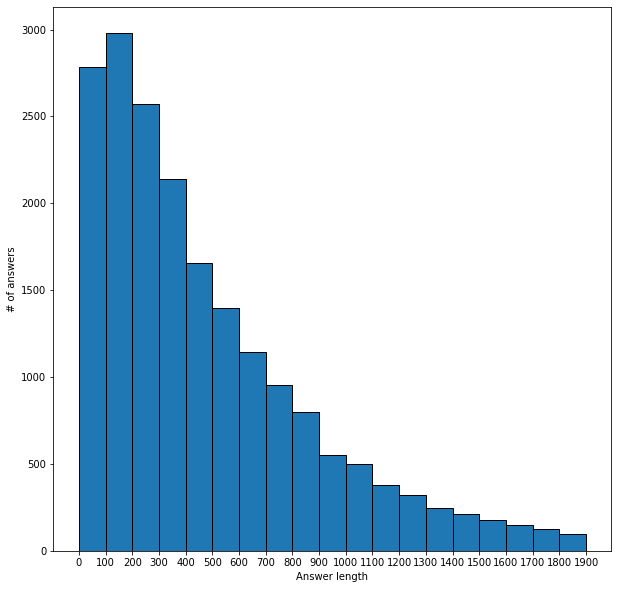

In [13]:
plot_hist(answer_lens, list(range(0, 2000, 100)), x_label="Answer length", y_label="# of answers")

In [19]:
question_lens = df['question_len']
print("Question length characteristics:")
print_stats(question_lens)

Question length characteristics:
Mean 30.767727098505173
Max 140
Min 1
Std 15.620620926116064


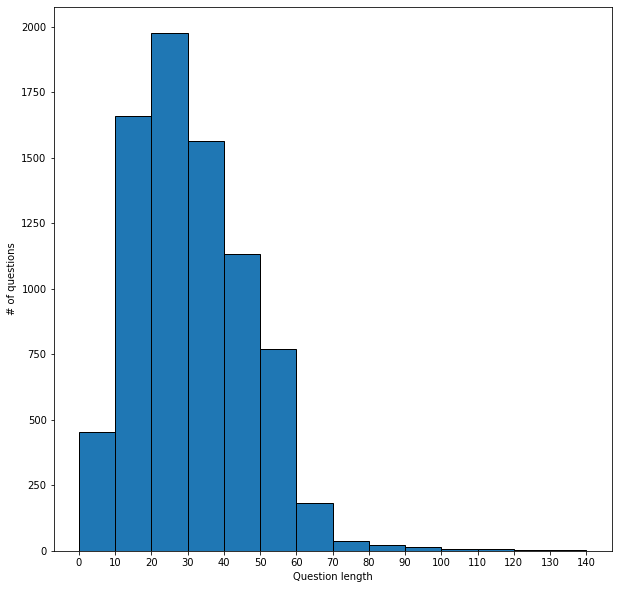

In [20]:
bins = list(range(0, 150, 10))
plot_hist(question_lens.values, bins, x_label="Question length", y_label="# of questions")

In [21]:
question_text_lens = df['question_text_len']
print("Question text length characteristics:")
print_stats(question_text_lens)

Question text length characteristics:
Mean 925.3527532898939
Max 16489
Min 0
Std 917.0621161522201


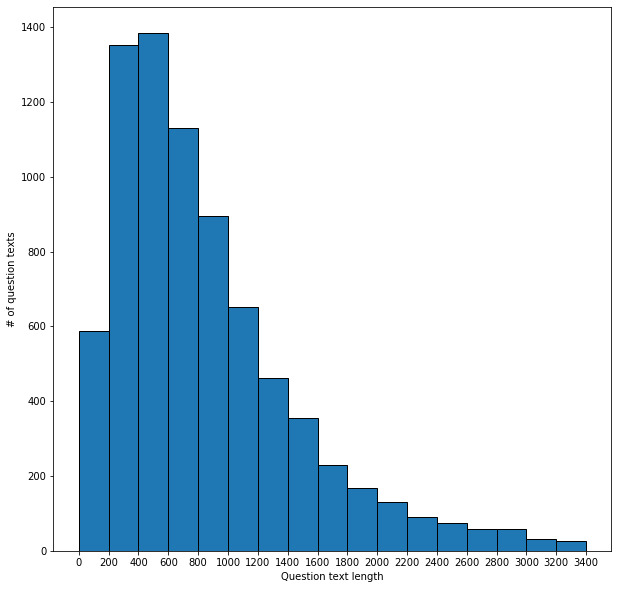

In [22]:
bins = list(range(0, 3500, 200))
plot_hist(question_text_lens.values, bins, x_label="Question text length", y_label="# of question texts")